In [57]:
import importlib
import dgl_runge_kutta
importlib.reload(dgl_runge_kutta)

<module 'dgl_runge_kutta' from '/home/florian/dev/github.com/thecodinglab/hm-scripts/sympy/dgl_runge_kutta.py'>

In [58]:
import numpy as np
import dgl_runge_kutta as runge_kutta

f = lambda x, y: x**2 + 0.1 * y

a = -1.5
b = 1.5
n = 5
y0 = 0

x_classic, y_classic = runge_kutta.classic(f, a, b, n, y0, print_steps=True)

#### Iteration 1

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Iteration 2

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Iteration 3

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Iteration 4

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### Iteration 5

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [59]:
# Euler:
intermediate_steps = 1
previous_intermediate_weights = np.array([[0]])
intermediate_weights = np.array([1])
intermediate_step_factors = np.array([0])

# Mittelpunkt:
# intermediate_steps = 2
# previous_intermediate_weights = np.array([
#     [0, 0],
#     [0.5, 0]
# ])
# intermediate_weights = np.array([0, 1])
# intermediate_step_factors = np.array([0, 0.5])

# Modifiziertes Euler:
# intermediate_steps = 2
# previous_intermediate_weights = np.array([
#     [0, 0],
#     [1, 0]
# ])
# intermediate_weights = np.array([0.5, 0.5])
# intermediate_step_factors = np.array([0, 1])

# Runge-Kutta Klassisch:
# intermediate_steps = 4
# previous_intermediate_weights = np.array([
#     [0, 0, 0, 0],
#     [0.5, 0, 0, 0],
#     [0, 0.5, 0, 0],
#     [0, 0, 1, 0]
# ])
# intermediate_weights = np.array([
#     1 / 6, 1 / 3, 1 / 3, 1 / 6
# ])
# intermediate_step_factors = np.array([
#     0, 0.5, 0.5, 1
# ])

x_dynamic, y_dynamic = runge_kutta.dynamic(
    f, a, b, n, y0,
    intermediate_steps,             # s
    previous_intermediate_weights,  # a
    intermediate_weights,           # b
    intermediate_step_factors,      # c
    print_steps=True
)

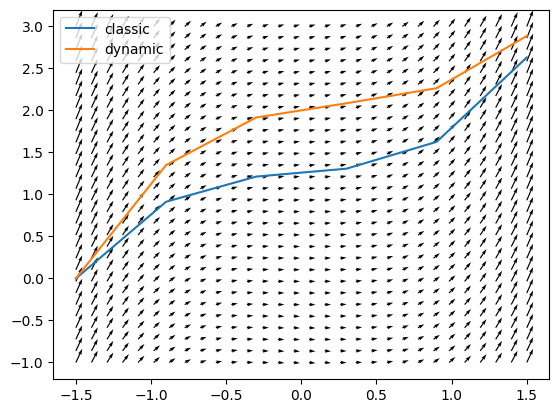

In [60]:
import matplotlib.pyplot as plt

x_min = a
x_max = b
y_min = -1
y_max = 3

count = 30
x, y = np.meshgrid(
    np.linspace(x_min, x_max, count),
    np.linspace(y_min, y_max, count)
)

plt.quiver(x, y, 1, f(x, y))

plt.plot(x_classic, y_classic, label="classic")
plt.plot(x_dynamic, y_dynamic, label="dynamic")
plt.legend()
plt.show()